## Let's load the neccessary packages and the dataset from kaggle:

The dataset we would be training our model on is the <a href="https://www.kaggle.com/ruizgara/socofing">SOCOFing dataset</a>. Let's download the kaggle dataset:

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

plt.rcParams['image.cmap'] = 'binary'

In [0]:
#@title Download the dataset from kaggle:
# install  kaggle
!pip install -q kaggle

# import necessary utility packages
import glob, zipfile, os

# download location of dataset
loc = input("Enter the download location (without an ending '/'): ")

# create a new dir if it doesn't already exists
from pathlib import Path
Path(loc).mkdir(parents=True, exist_ok=True)

# create new dir for kaggle
if not os.path.exists("/root/.kaggle"): 
    os.mkdir("/root/.kaggle")

# move kaggle.json and change permissions
if os.path.exists("kaggle.json"):
    # copy to kaggle directory, assuming "kaggle.json" exists
    os.rename("kaggle.json", "/root/.kaggle/kaggle.json")
    # change permissions of file -> full read & write access
    os.chmod("/root/.kaggle/kaggle.json", 600)
else:
    if not os.path.exists("/root/.kaggle/kaggle.json"):
        print ("kaggle.json doesn't exist. Please upload and continue.")

string = input("Enter the Dataset name: ")

if input("Enter 'c' for Competition Dataset or 'd' for User Dataset: ") == 'd':
    !kaggle datasets download -q {string} -p "{loc}"
else:
    !kaggle competitions download -q -c {string} -p "{loc}"

loc += "/"

files = glob.glob(loc + "*.zip")
for File in files:
    print ("Extracting and Removing:", File)
    zipfile.ZipFile(File).extractall(path=loc)
    os.remove(File)

# display downloaded files
print ("\nThe following files have been downloaded:\n")
for i, files in enumerate(glob.glob(loc + "*")):
    print (i+1, files.split("/")[-1])

Enter the download location (without an ending '/'): ./data
Enter the Dataset name: ruizgara/socofing
Enter 'c' for Competition Dataset or 'd' for User Dataset: d
Extracting and Removing: ./data/socofing.zip

The following files have been downloaded:

1 SOCOFing
2 socofing


Remove the extra folder that is redundant:

In [0]:
import shutil
shutil.rmtree("./data/socofing")
#shutil.rmtree("./ruizgara/")

In [0]:
data_path_real = "./data/SOCOFing/Real/"
data_path_alteredE = "./data/SOCOFing/Altered/Altered-Easy/"
data_path_alteredM = "./data/SOCOFing/Altered/Altered-Medium/"
data_path_alteredH = "./data/SOCOFing/Altered/Altered-Hard/"

## Understanding the dataset:
### Lets read the files persent in these directories and check their count:

In [0]:
real_files = tf.io.gfile.glob(data_path_real+"*")
easy_altered_files = tf.io.gfile.glob(data_path_alteredE + "*")
hard_altered_files = tf.io.gfile.glob(data_path_alteredH + "*")
med_altered_files = tf.io.gfile.glob(data_path_alteredM + "*")

real_len = len(real_files)
easy_altered_len = len(easy_altered_files)
hard_altered_len = len(hard_altered_files)
med_altered_len = len(med_altered_files)

print ("Original len:", real_len)
print ("Easy altered len:", easy_altered_len)
print ("Hard altered len:", hard_altered_len)
print ("Medium altered len:", med_altered_len)

Original len: 6000
Easy altered len: 17931
Hard altered len: 14272
Medium altered len: 17067


By default the data items are in BMP format, let's convert them to PNG and proceed further. We are going to save them to folder named `Converted`:

In [0]:
# creating the neccesary folder structure
os.mkdir("./data/Converted/")
os.mkdir("./data/Converted/Real")
os.mkdir("./data/Converted/Altered")
os.mkdir("./data/Converted/Altered/Altered-Hard")
os.mkdir("./data/Converted/Altered/Altered-Medium")
os.mkdir("./data/Converted/Altered/Altered-Easy")
! ls ./data

Converted  SOCOFing


In [0]:
files = tf.convert_to_tensor(real_files + hard_altered_files + med_altered_files + easy_altered_files)
files[-1]

<tf.Tensor: shape=(), dtype=string, numpy=b'./data/SOCOFing/Altered/Altered-Easy/208__M_Right_ring_finger_CR.BMP'>

In [0]:
import cv2
for file_loc in files:

    save_loc = tf.strings.regex_replace(file_loc, "BMP", "png")
    save_loc = tf.strings.regex_replace(save_loc, "SOCOFing", "Converted")

    cv2.imwrite(
        save_loc.numpy().decode(), 
        cv2.imread(file_loc.numpy().decode(), cv2.IMREAD_GRAYSCALE))

Lets reload the png data files:

In [0]:
data_path_real = "./data/Converted/Real/"
data_path_alteredE = "./data/Converted/Altered/Altered-Easy/"
data_path_alteredM = "./data/Converted/Altered/Altered-Medium/"
data_path_alteredH = "./data/Converted/Altered/Altered-Hard/"

real_files = tf.io.gfile.glob(data_path_real+"*")
easy_altered_files = tf.io.gfile.glob(data_path_alteredE + "*")
hard_altered_files = tf.io.gfile.glob(data_path_alteredH + "*")
med_altered_files = tf.io.gfile.glob(data_path_alteredM + "*")

# check whether the file loc has been loaded properly
len(real_files), len(easy_altered_files), len(med_altered_files), len(hard_altered_files)

(6000, 17931, 17067, 14272)

How do the different files look?

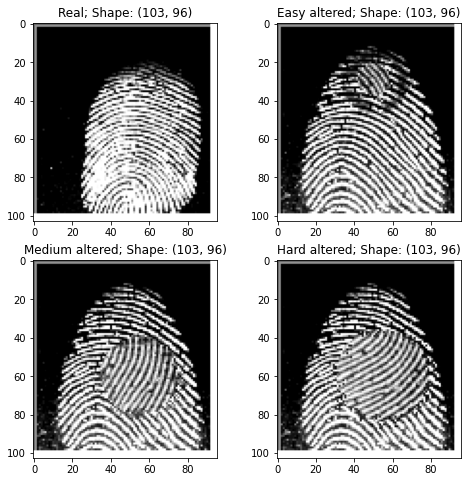

In [0]:
real_img = plt.imread(real_files[0])
easy_img = plt.imread(easy_altered_files[0])
med_img = plt.imread(med_altered_files[0])
hard_img = plt.imread(hard_altered_files[0])

f, ax = plt.subplots(2, 2, figsize=(8, 8))

ax[0][0].imshow(real_img)
ax[0][0].set_title(f"Real; Shape: {real_img.shape}")
ax[0][1].imshow(easy_img)
ax[0][1].set_title(f"Easy altered; Shape: {easy_img.shape}")
ax[1][0].imshow(med_img)
ax[1][0].set_title(f"Medium altered; Shape: {med_img.shape}")
ax[1][1].imshow(hard_img)
ax[1][1].set_title(f"Hard altered; Shape: {hard_img.shape}");

### Understanding the naming conventions:

In [0]:
real_files[0].split("/")[-1]

'247__M_Left_little_finger.png'

1. First three digits denote the ID of the person
2. Next field denotes the gender of the person
3. Next field denotes whether its the person's right or left hand
4. This is followed with the finger name
5. Optionally in altered datasets, the last field contains the type of alterations done over the dataset.

### Let's create a function that obtains these fields from the file names for further understanding of the dataset:

In [0]:
def mapper(string):
    '''Splits a the file names on "_" and returns the fields'''

    temp = tf.strings.split(string, "__")
    ID, temp = temp[:1], temp[1]
    temp = tf.strings.regex_replace(temp, ".(BMP|png)", "")
    temp = tf.strings.split(temp, "_")

    if temp.shape[0] < 5:
        temp = tf.concat((temp[:-1], tf.constant(["Real"])), axis=0)
    else:
        temp = tf.concat((temp[:-2], temp[-1:]), axis=0)

    return tf.concat((ID, temp), axis=0)

In [0]:
# check if our mapper works fine
mapper(easy_altered_files[0].split("/")[-1])

<tf.Tensor: shape=(5,), dtype=string, numpy=array([b'40', b'F', b'Right', b'index', b'CR'], dtype=object)>

Let's now write a function that loads the images and extracts the images into a tf.data.Dataset:

In [0]:
def parse_file(file_loc):
    
    # Extract the features from the image name
    file_name = tf.strings.split(file_loc, "/")[-1]
    features = tf.py_function(mapper, inp=[file_name], Tout=tf.string)
    features.set_shape([5,])

    # Load the image from the directory
    img = tf.io.read_file(file_loc)
    img = tf.io.decode_png(img, channels=1)
    img = tf.image.convert_image_dtype(img, dtype=tf.float32)
    img = tf.image.resize(img, size=(103, 96))
    
    return features, img

In [0]:
files = tf.convert_to_tensor(real_files + hard_altered_files + med_altered_files + easy_altered_files)
file_ds = tf.data.Dataset.from_tensor_slices(files)
file_ds = file_ds.map(parse_file)

We can now convert the tf.data.Dataset to a numpy array since we need random access rather than sequential access:

In [0]:
feature, img = next(iter(file_ds))
img.shape, feature.shape

(TensorShape([103, 96, 1]), TensorShape([5]))

The pbm here is that the file_ds returns a tensor whereas we need a numpy array to obtain the image and feature vectors in two different images.

In [0]:
temp = np.array(list(map(lambda x: (x[0].numpy(), x[1].numpy()), file_ds)))
features, imgs = np.vstack(temp[:, 0]), np.stack(temp[:, 1])
imgs.shape, features.shape

((55270, 103, 96, 1), (55270, 5))

In [0]:
np.save("./data/image_data.npy", imgs)
np.save("./data/features_data.npy", features)

In [0]:
# access all images of ID 100
imgs[(features[:, 0] == b'100').ravel()].shape

(99, 103, 96, 1)

In [0]:
# access all images of the same person but only the real images
imgs[np.all(features[:, [0, 4]] == [b'100', b'Real'], axis=1)].shape

(10, 103, 96, 1)

In [0]:
# access every other image of the same person
imgs[~(features[:, 0] == b'100').ravel()].shape

(55171, 103, 96, 1)

### Now that we are done processing and saving the images, lets move on to the model building process.

** Continued in the Next Notebook**